In [29]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import some related dependencies
1.   Numpy: a package for array transformation
2.   Pandas: a package for loading data with .csv/.xlsx formats
3.   Matplotlib: a package for data visualization
4.   Skearn: a package including many machine learning approaches
5.   Tensorflow: a package for neural networks modeling
5.   Keras: a package for neural networks modeling which is established on Tensorflow

In [30]:
import numpy as np #helps for array operation
import pandas as pd #helps to read the data
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.model_selection import train_test_split #helps to split training data and testing data
from sklearn.preprocessing import StandardScaler #helps for standardation of input data
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error # for calculating the cost function
import keras            #helps for CNN model construction
import tensorflow as tf #helps for CNN model construction
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

# Load data using Pandas package

1.   Data visualization 
2.   Data segmentation
3.   Training data and testing data split 

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/CS5812/HotelReservationPC2.csv')  #Load data with the corresponding path in google drive 

In [32]:
data.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,avg_price_per_room
0,1,0.520371,-1.668564,0.927438,1.547886,-0.965390,0.340538,0.903226,-0.643588,0.410653,-0.608921,65.00
1,2,-0.617368,1.224400,0.791655,-0.695871,-2.128210,-0.601427,1.261694,-0.250454,-0.599961,-0.497139,106.68
2,3,0.064520,-0.559081,-0.657512,-2.031699,0.992115,-1.437109,-0.653857,0.677637,-0.965789,-1.064728,60.00
3,4,-0.717636,-1.455004,-1.333113,-0.838380,0.197553,1.022634,-0.525507,0.563078,0.176432,0.158043,100.00
4,5,-0.510286,-0.099897,-0.499682,-2.376433,-0.354003,0.485311,0.790131,0.488215,-0.084242,-1.433973,94.50


In [33]:
print(data.shape)

(36274, 12)


In [34]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36274 entries, 0 to 36273
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          36274 non-null  int64  
 1   PC1                 36274 non-null  float64
 2   PC2                 36274 non-null  float64
 3   PC3                 36274 non-null  float64
 4   PC4                 36274 non-null  float64
 5   PC5                 36274 non-null  float64
 6   PC6                 36274 non-null  float64
 7   PC7                 36274 non-null  float64
 8   PC8                 36274 non-null  float64
 9   PC9                 36274 non-null  float64
 10  PC10                36274 non-null  float64
 11  avg_price_per_room  36274 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.3 MB
None


# Machine Learning Mehtod 1 - Random Forest Regressor

In [41]:
X = data.iloc[:,:-1]    # convert the input data to be an array
y = data.iloc[:,-1:]
print ('Shape of input:', X.shape)
print ('Shape of labels:', y.shape)


Shape of input: (36274, 11)
Shape of labels: (36274, 1)


In [42]:
 # Randomly split training data and test data with a ratio of 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## RF Model Training

In [43]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=0)

## RF Model Hyperparameters Tuning

Text(0.5, 1.0, 'ELBOW PLOT')

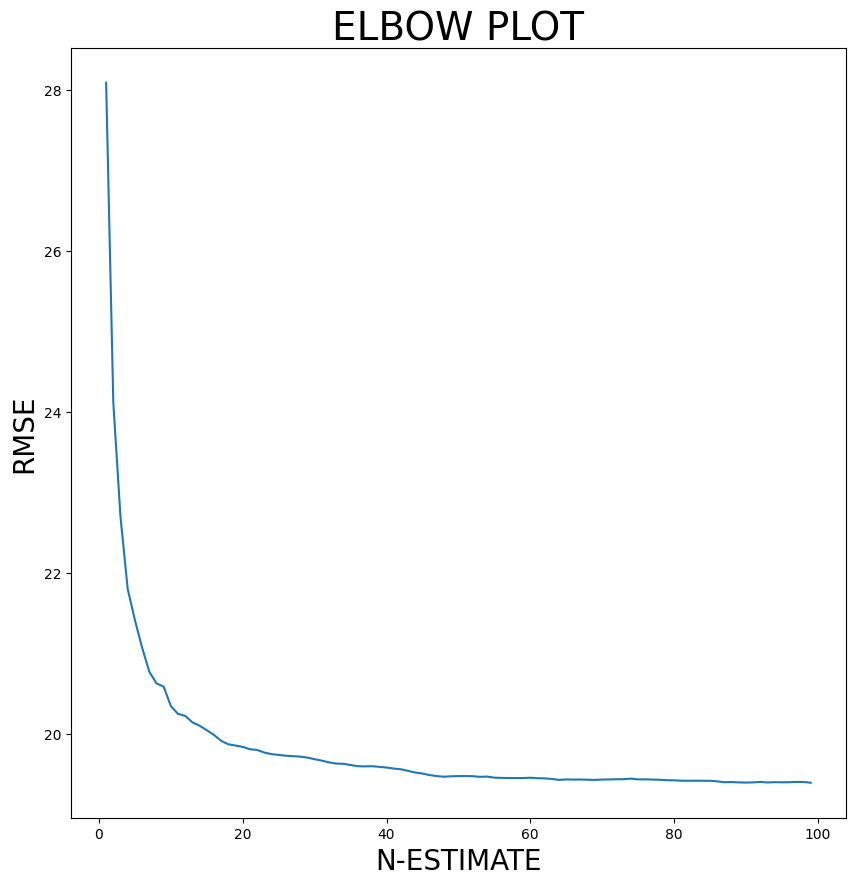

In [47]:
# Plotting the Elbow plot
fig,ax=plt.subplots(figsize=(10,10))
n_list=np.arange(1,100,1)
R_dict={} # To store n and rmse pairs
for i in n_list:
#Random Forest Model Creation
    regressor = RandomForestRegressor(n_estimators = int(i), random_state = 0)
    regressor.fit(X_train, y_train.values.ravel())
    y_pred = regressor.predict(X_test)

#Storing RMSE 
    rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    R_dict[i]=rmse
#Plotting the results
ax.plot(R_dict.keys(),R_dict.values())
ax.set_xlabel('N-ESTIMATE', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

#fig.savefig('/content/drive/MyDrive/ColabNotebooks/CS5812/RF ELBOW PLOT.png')   # save the figure to file
#plt.close(fig)    # close the figure window

The optiman number of estimators is 50 after which the RMSE value does not reduce any longer.

In [48]:
# Model training with optimal parameters
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train.values.ravel())


RandomForestRegressor(n_estimators=50, random_state=0)

## RF Model Testing

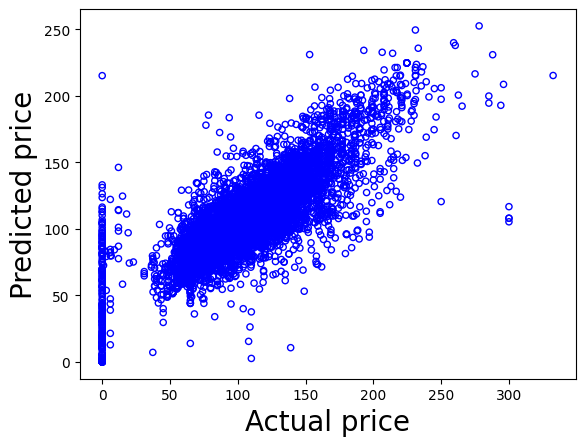

In [49]:
# Predicting the target values of the test set
y_pred = regressor.predict(X_test)
# Visualization
#fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis

plt.scatter(y_test, y_pred, s=20, marker='o', edgecolor=['blue'], c='none')
plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)
plt.show()

#fig.savefig('/content/drive/MyDrive/ColabNotebooks/CS5812/RandomForestModel.png')   # save the figure to file
#plt.close(fig)    # close the figure window

## RF Model Evaluation

In [50]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)



RMSE:  19.476


# Machine Learning Method 2 - k-Nearest Neighbours

In [32]:
X = data.iloc[:,:-1]    # convert the input data to be an array
y = data.iloc[:,-1:]
print ('Shape of input:', X.shape)
print ('Shape of labels:', y.shape)

Shape of input: (36274, 11)
Shape of labels: (36274, 1)


In [33]:
# Randomly split training data and test data with a ratio of 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

## KNN Hyperparameters Tuning

Text(0.5, 1.0, 'ELBOW PLOT')

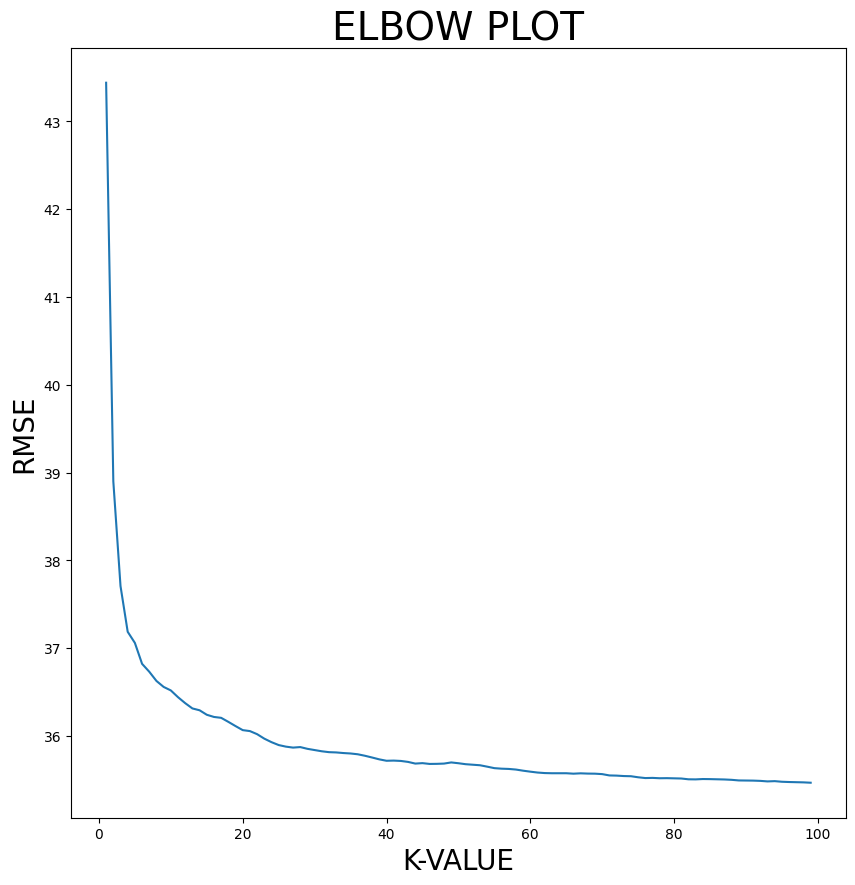

In [7]:
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,100,1)
knn_dict={} # To store k and rmse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
#Storing MSE 
    #mse=mean_squared_error(y_test,y_knn_pred)
    rmse = float(format(np.sqrt(mean_squared_error(y_test, y_knn_pred)), '.3f'))
    knn_dict[i]=rmse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

#fig.savefig('/content/drive/MyDrive/ColabNotebooks/CS5812/kNNModel.png')   # save the figure to file
#plt.close(fig)    # close the figure window

We have the best k-value when RMSE is lowest at k = 70. After this, the RMSE value no longer falls. So we can recreate our model with the optimal k-value.

## KNN Model Training

In [34]:
#Knn Model Training
knn=KNeighborsRegressor(n_neighbors=int(70))
model_knn=knn.fit(X_train,y_train)


## KNN Model Testing

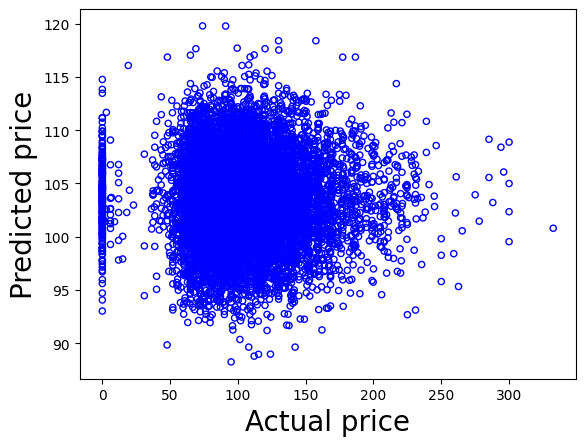

In [35]:
# Predicting the target values of the test set
y_knn_pred = model_knn.predict(X_test)
# Visualization
#fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis

plt.scatter(y_test, y_knn_pred, s=20, marker='o', edgecolor=['blue'], c='none')
plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)
plt.show()

#fig.savefig('/content/drive/MyDrive/ColabNotebooks/CS5812/kNNModel.png')   # save the figure to file
#plt.close(fig)    # close the figure window

## KNN Model Evaluation

In [36]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_knn_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  35.567


# Deep Learning Regression Model (Convolution Neural Network-CNN)

In [12]:
X = data.iloc[:,:-1]       
y = data.iloc[:,-1:].to_numpy().reshape(-1, 1)    
print ('Shape of input:', X.shape)
print ('Shape of labels:', y.shape)

Shape of input: (36274, 11)
Shape of labels: (36274, 1)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Randomly split training data and test data with a ratio of 7:3

In [14]:
X_train = np.expand_dims(X_train, axis=2) # Add a dimension for each training sample - 1 x 11 x 1
X_train = np.expand_dims(X_train, axis=2) # Add a dimension for each training sample to form an image - 1 x 11 x 1 x 1

X_test = np.expand_dims(X_test, axis=2)   # Add a dimension for each testing sample - 1 x 11 x 1
X_test = np.expand_dims(X_test, axis=2)   # Add a dimension for each testing sample to form an image - 1 x 11 x 1 x 1

In [15]:
print (X_train.shape)
print (X_test.shape)

(25391, 11, 1, 1)
(10883, 11, 1, 1)


## CNN Model Training

In [ ]:
# LeNet-5 structure for model training
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu', input_shape=(11, 1, 1)))  # The first convolutional layer. Input shape is 11x1x1 and activation function is Rectified Linear Unit (ReLU).\
                                                           # Kernel size and stride are set as (5,1) and (1,1), respectively. The number of convolutional kernels is 6. Besides, the zero padding is 'same', thus the output shape is (11/1) x 1 x 6 = 11x1x6, which is the same as the input shape.
model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The first maxpooling layer. The pool size and stride are both (2,1), thus the output shape is 5x1x6, where 5 = (11-2)/2 + 1.
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu')) # The second convolutional layer. The output shape is 5x1x16, where 5 = 5/1.
model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The second maxpooling layer. The pool size and stride are both (2,1). The output shape is 2x1x16, where 2 = (5-2)/2 +1.
model.add(keras.layers.Flatten())                          # The previous output is flattened to be a vector.
model.add(keras.layers.Dense(120, activation='relu'))      # The first fully connected layer.
model.add(keras.layers.Dense(84, activation='relu'))       # The second fully connected layer.
model.add(keras.layers.Dense(1))                           # we have 1 neuron for output (SalePrice).
model.summary()                                            # Summary the constructed model.
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-11), 'mean_squared_error') # Model construction with a SGD optimizer and a mean squared error loss function.
model.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose = 2)             # Model training with some hyperparameters.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 1, 6)          36        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 1, 6)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 1, 16)          496       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 120)               3

##CNN Hyperparameter Tuning

### Finding the best parameters using manual grid search

In [ ]:
# Defining a function to find the best parameters for CNN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', '\nRMSE'])
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create CNN model
            model = keras.Sequential()
            # Defining the first layer of the model
            model.add(keras.layers.Conv2D(filters=6, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu', input_shape=(11, 1, 1)))# Kernel size and stride are set as (5,1) and (1,1), respectively. The number of convolutional kernels is 6. Besides, the zero padding is 'same', thus the output shape is (11/1) x 1 x 6 = 11x1x6, which is the same as the input shape.
            model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The first maxpooling layer. The pool size and stride are both (2,1), thus the output shape is 5x1x6, where 5 = (11-2)/2 + 1.
            model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu')) # The second convolutional layer. The output shape is 5x1x16, where 5 = 5/1.
            model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The second maxpooling layer. The pool size and stride are both (2,1). The output shape is 2x1x16, where 2 = (5-2)/2 +1.
            model.add(keras.layers.Flatten())                          # The previous output is flattened to be a vector.
            model.add(keras.layers.Dense(120, activation='relu'))      # The first fully connected layer.
            model.add(keras.layers.Dense(84, activation='relu'))       # The second fully connected layer.
            model.add(keras.layers.Dense(1))                           # we have 1 neuron for output (SalePrice).
            model.summary()                                            # Summary the constructed model.
            model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-11), 'mean_squared_error') # Model construction with a SGD optimizer and a mean squared error loss function.
            model.fit(X_train, y_train, epochs = epochs_trial, batch_size = batch_size_trial, verbose = 2)             # Model training with some hyperparameters.
            rmse = float(format(np.sqrt(mean_squared_error(y_test, model.predict(X_test))), '.3f'))
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, '\nRMSE: ', rmse)
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],
                                                                    columns=['TrialNumber', 'Parameters', '\nRMSE'] ))
    return(SearchResultsData)
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 11, 1, 6)          36        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 1, 6)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 1, 16)          496       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 120)              

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/10
5079/5079 - 9s - loss: 38369.3945 - 9s/epoch - 2ms/step
Epoch 2/10
5079/5079 - 10s - loss: 3899.1685 - 10s/epoch - 2ms/step
Epoch 3/10
5079/5079 - 10s - loss: 3899.5176 - 10s/epoch - 2ms/step
Epoch 4/10
5079/5079 - 9s - loss: 3898.6858 - 9s/epoch - 2ms/step
Epoch 5/10
5079/5079 - 10s - loss: 3899.2976 - 10s/epoch - 2ms/step
Epoch 6/10
5079/5079 - 10s - loss: 3899.3735 - 10s/epoch - 2ms/step
Epoch 7/10
5079/5079 - 11s - loss: 3899.3987 - 11s/epoch - 2ms/step
Epoch 8/10
5079/5079 - 8s - loss: 3899.5146 - 8s/epoch - 2ms/step
Epoch 9/10
5079/5079 - 10s - loss: 3898.9185 - 10s/epoch - 2ms/step
Epoch 10/10
5079/5079 - 9s - loss: 3899.1699 - 9s/epoch - 2ms/step
341/341 [==============================] - 1s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 
RMSE:  62.864
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 11, 1, 6)          36    

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/50
5079/5079 - 11s - loss: 53307.6055 - 11s/epoch - 2ms/step
Epoch 2/50
5079/5079 - 10s - loss: 3894.4004 - 10s/epoch - 2ms/step
Epoch 3/50
5079/5079 - 9s - loss: 3894.4109 - 9s/epoch - 2ms/step
Epoch 4/50
5079/5079 - 10s - loss: 3894.4316 - 10s/epoch - 2ms/step
Epoch 5/50
5079/5079 - 10s - loss: 3894.3506 - 10s/epoch - 2ms/step
Epoch 6/50
5079/5079 - 10s - loss: 3894.3950 - 10s/epoch - 2ms/step
Epoch 7/50
5079/5079 - 9s - loss: 3894.2769 - 9s/epoch - 2ms/step
Epoch 8/50
5079/5079 - 10s - loss: 3894.1870 - 10s/epoch - 2ms/step
Epoch 9/50
5079/5079 - 9s - loss: 3894.4534 - 9s/epoch - 2ms/step
Epoch 10/50
5079/5079 - 10s - loss: 3894.3259 - 10s/epoch - 2ms/step
Epoch 11/50
5079/5079 - 10s - loss: 3894.5090 - 10s/epoch - 2ms/step
Epoch 12/50
5079/5079 - 10s - loss: 3894.1877 - 10s/epoch - 2ms/step
Epoch 13/50
5079/5079 - 9s - loss: 3894.1575 - 9s/epoch - 2ms/step
Epoch 14/50
5079/5079 - 10s - loss: 3894.3525 - 10s/epoch - 2ms/step
Epoch 15/50
5079/5079 - 10s - loss: 3894.4688 - 10

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/100
5079/5079 - 10s - loss: 20800.9336 - 10s/epoch - 2ms/step
Epoch 2/100
5079/5079 - 10s - loss: 3899.6895 - 10s/epoch - 2ms/step
Epoch 3/100
5079/5079 - 8s - loss: 3893.8340 - 8s/epoch - 2ms/step
Epoch 4/100
5079/5079 - 9s - loss: 3893.7705 - 9s/epoch - 2ms/step
Epoch 5/100
5079/5079 - 10s - loss: 3893.7673 - 10s/epoch - 2ms/step
Epoch 6/100
5079/5079 - 8s - loss: 3893.8184 - 8s/epoch - 2ms/step
Epoch 7/100
5079/5079 - 9s - loss: 3893.8462 - 9s/epoch - 2ms/step
Epoch 8/100
5079/5079 - 9s - loss: 3893.8179 - 9s/epoch - 2ms/step
Epoch 9/100
5079/5079 - 8s - loss: 3893.8074 - 8s/epoch - 2ms/step
Epoch 10/100
5079/5079 - 10s - loss: 3893.7542 - 10s/epoch - 2ms/step
Epoch 11/100
5079/5079 - 10s - loss: 3893.8948 - 10s/epoch - 2ms/step
Epoch 12/100
5079/5079 - 9s - loss: 3893.8250 - 9s/epoch - 2ms/step
Epoch 13/100
5079/5079 - 9s - loss: 3893.8264 - 9s/epoch - 2ms/step
Epoch 14/100
5079/5079 - 9s - loss: 3893.7122 - 9s/epoch - 2ms/step
Epoch 15/100
5079/5079 - 8s - loss: 3893.9316 

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/5
2540/2540 - 6s - loss: 6277.2617 - 6s/epoch - 2ms/step
Epoch 2/5
2540/2540 - 6s - loss: 3896.8516 - 6s/epoch - 2ms/step
Epoch 3/5
2540/2540 - 4s - loss: 3896.9272 - 4s/epoch - 2ms/step
Epoch 4/5
2540/2540 - 4s - loss: 3896.8955 - 4s/epoch - 2ms/step
Epoch 5/5
2540/2540 - 6s - loss: 3896.9019 - 6s/epoch - 2ms/step
341/341 [==============================] - 1s 2ms/step
5 Parameters: batch_size: 10 - epochs: 5 
RMSE:  62.854
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 11, 1, 6)          36        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 1, 6)          0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 5, 1, 16)          496       
              

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/10
2540/2540 - 5s - loss: 5325.3970 - 5s/epoch - 2ms/step
Epoch 2/10
2540/2540 - 5s - loss: 3896.2422 - 5s/epoch - 2ms/step
Epoch 3/10
2540/2540 - 4s - loss: 3896.4749 - 4s/epoch - 2ms/step
Epoch 4/10
2540/2540 - 5s - loss: 3896.0933 - 5s/epoch - 2ms/step
Epoch 5/10
2540/2540 - 5s - loss: 3896.4641 - 5s/epoch - 2ms/step
Epoch 6/10
2540/2540 - 5s - loss: 3896.3926 - 5s/epoch - 2ms/step
Epoch 7/10
2540/2540 - 6s - loss: 3896.2993 - 6s/epoch - 2ms/step
Epoch 8/10
2540/2540 - 5s - loss: 3896.4221 - 5s/epoch - 2ms/step
Epoch 9/10
2540/2540 - 4s - loss: 3896.4817 - 4s/epoch - 2ms/step
Epoch 10/10
2540/2540 - 6s - loss: 3896.4258 - 6s/epoch - 2ms/step
341/341 [==============================] - 1s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 
RMSE:  62.849
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 11, 1, 6)          36        
       

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/50
2540/2540 - 5s - loss: 46617.5273 - 5s/epoch - 2ms/step
Epoch 2/50
2540/2540 - 4s - loss: 3889.6274 - 4s/epoch - 2ms/step
Epoch 3/50
2540/2540 - 5s - loss: 3889.7026 - 5s/epoch - 2ms/step
Epoch 4/50
2540/2540 - 4s - loss: 3889.5332 - 4s/epoch - 2ms/step
Epoch 5/50
2540/2540 - 4s - loss: 3889.3567 - 4s/epoch - 2ms/step
Epoch 6/50
2540/2540 - 5s - loss: 3889.5508 - 5s/epoch - 2ms/step
Epoch 7/50
2540/2540 - 4s - loss: 3889.6741 - 4s/epoch - 2ms/step
Epoch 8/50
2540/2540 - 4s - loss: 3889.4524 - 4s/epoch - 2ms/step
Epoch 9/50
2540/2540 - 5s - loss: 3889.2664 - 5s/epoch - 2ms/step
Epoch 10/50
2540/2540 - 4s - loss: 3889.5884 - 4s/epoch - 2ms/step
Epoch 11/50
2540/2540 - 4s - loss: 3888.6638 - 4s/epoch - 2ms/step
Epoch 12/50
2540/2540 - 5s - loss: 3889.6084 - 5s/epoch - 2ms/step
Epoch 13/50
2540/2540 - 4s - loss: 3889.2502 - 4s/epoch - 2ms/step
Epoch 14/50
2540/2540 - 4s - loss: 3889.6235 - 4s/epoch - 2ms/step
Epoch 15/50
2540/2540 - 5s - loss: 3889.0908 - 5s/epoch - 2ms/step
Epo

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/100
2540/2540 - 5s - loss: 145643.6719 - 5s/epoch - 2ms/step
Epoch 2/100
2540/2540 - 4s - loss: 3896.0261 - 4s/epoch - 2ms/step
Epoch 3/100
2540/2540 - 5s - loss: 3896.0564 - 5s/epoch - 2ms/step
Epoch 4/100
2540/2540 - 4s - loss: 3896.0510 - 4s/epoch - 2ms/step
Epoch 5/100
2540/2540 - 4s - loss: 3896.1060 - 4s/epoch - 2ms/step
Epoch 6/100
2540/2540 - 6s - loss: 3896.0002 - 6s/epoch - 2ms/step
Epoch 7/100
2540/2540 - 4s - loss: 3896.0383 - 4s/epoch - 2ms/step
Epoch 8/100
2540/2540 - 5s - loss: 3896.0437 - 5s/epoch - 2ms/step
Epoch 9/100
2540/2540 - 6s - loss: 3895.9407 - 6s/epoch - 2ms/step
Epoch 10/100
2540/2540 - 4s - loss: 3896.1533 - 4s/epoch - 2ms/step
Epoch 11/100
2540/2540 - 5s - loss: 3896.1008 - 5s/epoch - 2ms/step
Epoch 12/100
2540/2540 - 4s - loss: 3895.5239 - 4s/epoch - 2ms/step
Epoch 13/100
2540/2540 - 4s - loss: 3896.0012 - 4s/epoch - 2ms/step
Epoch 14/100
2540/2540 - 5s - loss: 3895.9316 - 5s/epoch - 2ms/step
Epoch 15/100
2540/2540 - 4s - loss: 3896.0876 - 4s/epoc

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/5
1693/1693 - 4s - loss: 5345.5879 - 4s/epoch - 2ms/step
Epoch 2/5
1693/1693 - 3s - loss: 3899.6829 - 3s/epoch - 2ms/step
Epoch 3/5
1693/1693 - 3s - loss: 3899.6001 - 3s/epoch - 2ms/step
Epoch 4/5
1693/1693 - 4s - loss: 3899.0537 - 4s/epoch - 2ms/step
Epoch 5/5
1693/1693 - 3s - loss: 3899.7139 - 3s/epoch - 2ms/step
341/341 [==============================] - 1s 2ms/step
9 Parameters: batch_size: 15 - epochs: 5 
RMSE:  62.875
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 11, 1, 6)          36        
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 1, 6)          0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 5, 1, 16)          496       
             

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/10
1693/1693 - 5s - loss: 14662.0264 - 5s/epoch - 3ms/step
Epoch 2/10
1693/1693 - 3s - loss: 3992.1309 - 3s/epoch - 2ms/step
Epoch 3/10
1693/1693 - 3s - loss: 3889.6096 - 3s/epoch - 2ms/step
Epoch 4/10
1693/1693 - 3s - loss: 3888.2231 - 3s/epoch - 2ms/step
Epoch 5/10
1693/1693 - 4s - loss: 3888.1038 - 4s/epoch - 2ms/step
Epoch 6/10
1693/1693 - 3s - loss: 3888.0391 - 3s/epoch - 2ms/step
Epoch 7/10
1693/1693 - 3s - loss: 3888.0015 - 3s/epoch - 2ms/step
Epoch 8/10
1693/1693 - 3s - loss: 3887.9753 - 3s/epoch - 2ms/step
Epoch 9/10
1693/1693 - 4s - loss: 3887.9575 - 4s/epoch - 2ms/step
Epoch 10/10
1693/1693 - 3s - loss: 3887.9272 - 3s/epoch - 2ms/step
341/341 [==============================] - 1s 2ms/step
10 Parameters: batch_size: 15 - epochs: 10 
RMSE:  62.783
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 11, 1, 6)          36        
    

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/50
1693/1693 - 4s - loss: 4643.9380 - 4s/epoch - 2ms/step
Epoch 2/50
1693/1693 - 3s - loss: 3889.8330 - 3s/epoch - 2ms/step
Epoch 3/50
1693/1693 - 4s - loss: 3889.5493 - 4s/epoch - 2ms/step
Epoch 4/50
1693/1693 - 3s - loss: 3889.5886 - 3s/epoch - 2ms/step
Epoch 5/50
1693/1693 - 3s - loss: 3889.6299 - 3s/epoch - 2ms/step
Epoch 6/50
1693/1693 - 3s - loss: 3889.4011 - 3s/epoch - 2ms/step
Epoch 7/50
1693/1693 - 4s - loss: 3889.5596 - 4s/epoch - 2ms/step
Epoch 8/50
1693/1693 - 3s - loss: 3889.0974 - 3s/epoch - 2ms/step
Epoch 9/50
1693/1693 - 3s - loss: 3889.7083 - 3s/epoch - 2ms/step
Epoch 10/50
1693/1693 - 3s - loss: 3889.8933 - 3s/epoch - 2ms/step
Epoch 11/50
1693/1693 - 4s - loss: 3889.7485 - 4s/epoch - 2ms/step
Epoch 12/50
1693/1693 - 3s - loss: 3889.0505 - 3s/epoch - 2ms/step
Epoch 13/50
1693/1693 - 3s - loss: 3889.5159 - 3s/epoch - 2ms/step
Epoch 14/50
1693/1693 - 3s - loss: 3889.5618 - 3s/epoch - 2ms/step
Epoch 15/50
1693/1693 - 3s - loss: 3889.7893 - 3s/epoch - 2ms/step
Epoc

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/100
1693/1693 - 5s - loss: 12343.5762 - 5s/epoch - 3ms/step
Epoch 2/100
1693/1693 - 3s - loss: 3888.4468 - 3s/epoch - 2ms/step
Epoch 3/100
1693/1693 - 3s - loss: 3888.3840 - 3s/epoch - 2ms/step
Epoch 4/100
1693/1693 - 3s - loss: 3888.0554 - 3s/epoch - 2ms/step
Epoch 5/100
1693/1693 - 4s - loss: 3888.6223 - 4s/epoch - 3ms/step
Epoch 6/100
1693/1693 - 3s - loss: 3888.2961 - 3s/epoch - 2ms/step
Epoch 7/100
1693/1693 - 3s - loss: 3888.2375 - 3s/epoch - 2ms/step
Epoch 8/100
1693/1693 - 3s - loss: 3888.3533 - 3s/epoch - 2ms/step
Epoch 9/100
1693/1693 - 4s - loss: 3888.3093 - 4s/epoch - 3ms/step
Epoch 10/100
1693/1693 - 3s - loss: 3888.4817 - 3s/epoch - 2ms/step
Epoch 11/100
1693/1693 - 3s - loss: 3888.4575 - 3s/epoch - 2ms/step
Epoch 12/100
1693/1693 - 3s - loss: 3888.4304 - 3s/epoch - 2ms/step
Epoch 13/100
1693/1693 - 4s - loss: 3888.3711 - 4s/epoch - 2ms/step
Epoch 14/100
1693/1693 - 3s - loss: 3888.3091 - 3s/epoch - 2ms/step
Epoch 15/100
1693/1693 - 3s - loss: 3888.3696 - 3s/epoch

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/5
1270/1270 - 4s - loss: 13113.1260 - 4s/epoch - 3ms/step
Epoch 2/5
1270/1270 - 2s - loss: 3923.1646 - 2s/epoch - 2ms/step
Epoch 3/5
1270/1270 - 2s - loss: 3889.4280 - 2s/epoch - 2ms/step
Epoch 4/5
1270/1270 - 2s - loss: 3889.0659 - 2s/epoch - 2ms/step
Epoch 5/5
1270/1270 - 2s - loss: 3889.0522 - 2s/epoch - 2ms/step
341/341 [==============================] - 1s 2ms/step
13 Parameters: batch_size: 20 - epochs: 5 
RMSE:  62.792
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 11, 1, 6)          36        
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 1, 6)          0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 5, 1, 16)          496       
           

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/10
1270/1270 - 4s - loss: 554592.9375 - 4s/epoch - 3ms/step
Epoch 2/10
1270/1270 - 2s - loss: 3911.9187 - 2s/epoch - 2ms/step
Epoch 3/10
1270/1270 - 2s - loss: 3890.4695 - 2s/epoch - 2ms/step
Epoch 4/10
1270/1270 - 2s - loss: 3890.4436 - 2s/epoch - 2ms/step
Epoch 5/10
1270/1270 - 2s - loss: 3890.4468 - 2s/epoch - 2ms/step
Epoch 6/10
1270/1270 - 3s - loss: 3890.4517 - 3s/epoch - 3ms/step
Epoch 7/10
1270/1270 - 3s - loss: 3890.3696 - 3s/epoch - 2ms/step
Epoch 8/10
1270/1270 - 2s - loss: 3890.4260 - 2s/epoch - 2ms/step
Epoch 9/10
1270/1270 - 2s - loss: 3890.2534 - 2s/epoch - 2ms/step
Epoch 10/10
1270/1270 - 2s - loss: 3890.5159 - 2s/epoch - 2ms/step
341/341 [==============================] - 1s 2ms/step
14 Parameters: batch_size: 20 - epochs: 10 
RMSE:  62.803
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 11, 1, 6)          36        
   

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/50
1270/1270 - 4s - loss: 76028.3281 - 4s/epoch - 4ms/step
Epoch 2/50
1270/1270 - 2s - loss: 3895.7700 - 2s/epoch - 2ms/step
Epoch 3/50
1270/1270 - 2s - loss: 3895.4705 - 2s/epoch - 2ms/step
Epoch 4/50
1270/1270 - 2s - loss: 3895.5986 - 2s/epoch - 2ms/step
Epoch 5/50
1270/1270 - 2s - loss: 3895.5969 - 2s/epoch - 2ms/step
Epoch 6/50
1270/1270 - 3s - loss: 3895.4451 - 3s/epoch - 3ms/step
Epoch 7/50
1270/1270 - 2s - loss: 3895.5857 - 2s/epoch - 2ms/step
Epoch 8/50
1270/1270 - 2s - loss: 3895.6128 - 2s/epoch - 2ms/step
Epoch 9/50
1270/1270 - 2s - loss: 3895.3806 - 2s/epoch - 2ms/step
Epoch 10/50
1270/1270 - 2s - loss: 3895.4915 - 2s/epoch - 2ms/step
Epoch 11/50
1270/1270 - 3s - loss: 3895.5713 - 3s/epoch - 2ms/step
Epoch 12/50
1270/1270 - 3s - loss: 3895.4851 - 3s/epoch - 2ms/step
Epoch 13/50
1270/1270 - 2s - loss: 3895.4004 - 2s/epoch - 2ms/step
Epoch 14/50
1270/1270 - 2s - loss: 3895.5225 - 2s/epoch - 2ms/step
Epoch 15/50
1270/1270 - 2s - loss: 3895.6570 - 2s/epoch - 2ms/step
Epo

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


Epoch 1/100
1270/1270 - 3s - loss: 40807.1133 - 3s/epoch - 2ms/step
Epoch 2/100
1270/1270 - 2s - loss: 3909.4539 - 2s/epoch - 2ms/step
Epoch 3/100
1270/1270 - 2s - loss: 3899.3032 - 2s/epoch - 2ms/step
Epoch 4/100
1270/1270 - 4s - loss: 3899.0256 - 4s/epoch - 3ms/step
Epoch 5/100
1270/1270 - 2s - loss: 3899.0276 - 2s/epoch - 2ms/step
Epoch 6/100
1270/1270 - 2s - loss: 3899.0061 - 2s/epoch - 2ms/step
Epoch 7/100
1270/1270 - 2s - loss: 3898.9802 - 2s/epoch - 2ms/step
Epoch 8/100
1270/1270 - 2s - loss: 3898.9858 - 2s/epoch - 2ms/step
Epoch 9/100
1270/1270 - 3s - loss: 3898.9021 - 3s/epoch - 2ms/step
Epoch 10/100
1270/1270 - 3s - loss: 3899.0210 - 3s/epoch - 2ms/step
Epoch 11/100
1270/1270 - 2s - loss: 3898.9617 - 2s/epoch - 2ms/step
Epoch 12/100
1270/1270 - 2s - loss: 3898.9971 - 2s/epoch - 2ms/step
Epoch 13/100
1270/1270 - 2s - loss: 3898.9507 - 2s/epoch - 2ms/step
Epoch 14/100
1270/1270 - 2s - loss: 3899.0244 - 2s/epoch - 2ms/step
Epoch 15/100
1270/1270 - 4s - loss: 3898.9907 - 4s/epoch

<ipython-input-52-cab26893af0b>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), rmse]],


### CNN Model Training with optimal parameters

In [16]:
# LeNet-5 structure for model training
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu', input_shape=(11, 1, 1)))  # The first convolutional layer. Input shape is 11x1x1 and activation function is Rectified Linear Unit (ReLU).\
                                                           # Kernel size and stride are set as (5,1) and (1,1), respectively. The number of convolutional kernels is 6. Besides, the zero padding is 'same', thus the output shape is (11/1) x 1 x 6 = 11x1x6, which is the same as the input shape.
model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The first maxpooling layer. The pool size and stride are both (2,1), thus the output shape is 5x1x6, where 5 = (11-2)/2 + 1.
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu')) # The second convolutional layer. The output shape is 5x1x16, where 5 = 5/1.
model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The second maxpooling layer. The pool size and stride are both (2,1). The output shape is 2x1x16, where 2 = (5-2)/2 +1.
model.add(keras.layers.Flatten())                          # The previous output is flattened to be a vector.
model.add(keras.layers.Dense(120, activation='relu'))      # The first fully connected layer.
model.add(keras.layers.Dense(84, activation='relu'))       # The second fully connected layer.
model.add(keras.layers.Dense(1))                           # we have 1 neuron for output (SalePrice).
model.summary()                                            # Summary the constructed model.
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-11), 'mean_squared_error') # Model construction with a SGD optimizer and a mean squared error loss function.
model.fit(X_train, y_train, epochs = 10, batch_size = 15, verbose = 2)             # Model training with some hyperparameters.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 1, 6)          36        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 1, 6)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 1, 16)          496       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 120)               3

## CNN Model testing

341/341 [==============================] - 1s 2ms/step


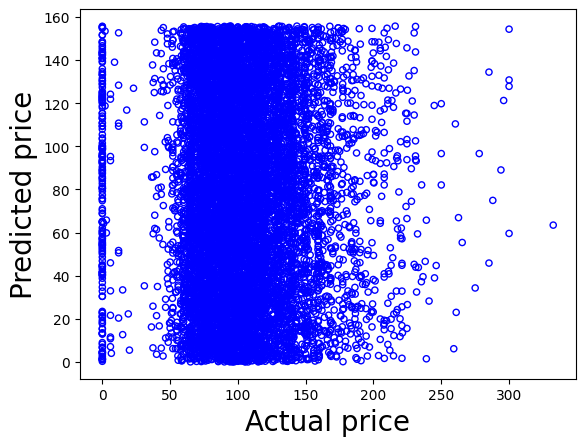

In [17]:
y_pred = model.predict(X_test)    # Prediction of the testing set

# Visualization
#fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis

plt.scatter(y_test, y_pred, s=20, marker='o', edgecolor=['blue'], c='none')
plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)
plt.show()

#fig.savefig('/content/drive/MyDrive/ColabNotebooks/CS5812/CNN model before Normalization.png')   # save the figure to file
#plt.close(fig)    # close the figure window

## CNN Model Evaluation

In [18]:
model.evaluate(X_test, y_test)  #performance evaluation

341/341 [==============================] - 1s 2ms/step - loss: 3949.1582


3949.158203125

In [19]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  62.842


# Data normalization
We find the learning rate is very small, which is confusing. To solve this issue, a data normalization is performed.


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Randomly split training data and testing data with a ratio of 7:3

In [41]:
scaler = StandardScaler()   # Standardization function  
scaler.fit(X_train)         # Standardization fitting using training data 
X_train = scaler.transform(X_train) # Standardization transformation of training data 
X_test = scaler.transform(X_test)   # Standardization transformation of testing data 

X_train = np.expand_dims(X_train, axis=2) # Add a dimension for each training sample - 1 x 11 x 1
X_train = np.expand_dims(X_train, axis=2) # Add a dimension for each training sample to form an image - 1 x 11 x 1 x 1
X_test = np.expand_dims(X_test, axis=2)   # Add a dimension for each testing sample - 1 x 11 x 1
X_test = np.expand_dims(X_test, axis=2)   # Add a dimension for each testing sample to form an image - 1 x 11 x 1 x 1

y_train_max = max(y_train)      # The maximum value of training labels
y_train = y_train/y_train_max   # Normalization of training labels
y_test = y_test/y_train_max     # Normalization of testing labels

In [42]:
# LeNet-5 structure for model training
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu', input_shape=(11, 1, 1)))  # The first convolutional layer. Input shape is 8x1x1 and activation function is Rectified Linear Unit (ReLU).\
                                                           # Kernel size and stride are set as (5,1) and (1,1), respectively. The number of convolutional kernels is 6. Besides, the zero padding is 'same', thus the output shape is (8/1) x 1 x 6 = 8x1x6, which is the same as the input shape.
model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The first maxpooling layer. The pool size and stride are both (2,1), thus the output shape is 4x1x6, where 4 = (8-2)/2 + 1.
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu')) # The second convolutional layer. The output shape is 4x1x16, where 4 = 4/1.
model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The second maxpooling layer. The pool size and stride are both (2,1). The output shape is 2x1x16, where 2 = (4-2)/2+1.
model.add(keras.layers.Flatten())                          # Flatten the previous output to be a vector.
model.add(keras.layers.Dense(120, activation='relu'))      # The first fully connected layer.
model.add(keras.layers.Dense(84, activation='relu'))       # The second fully connected layer.
model.add(keras.layers.Dense(1))                           # we have 1 neuron for output (SalePrice).
model.summary()                                            # Summary the constructed model.
model.compile(tf.keras.optimizers.SGD(learning_rate = 3e-2), 'mean_squared_error') # Model construction with a SGD optimizer and a mean squared error loss function.
model.fit(X_train, y_train, epochs = 10, batch_size = 15, verbose = 2)             # Model training with some hyperparameters.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 11, 1, 6)          36        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 1, 6)          0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 1, 16)          496       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 120)              

341/341 [==============================] - 1s 2ms/step


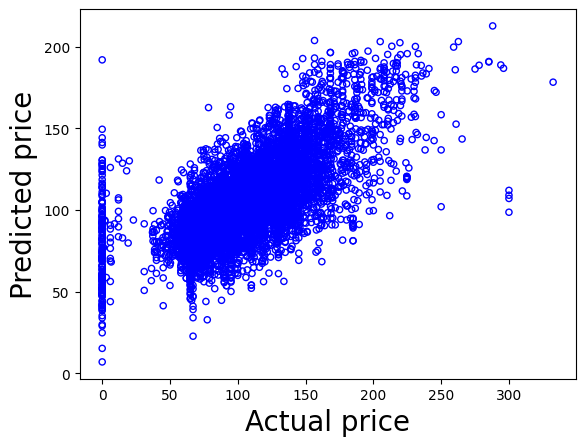

In [43]:
prediction = model.predict(X_test)    # Prediction of the testing set

# Visualization
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
plt.scatter(y_test*y_train_max, prediction*y_train_max, s=20, marker='o', edgecolor=['blue'], c='none')
plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)
plt.show()

fig.savefig('/content/drive/MyDrive/ColabNotebooks/CS5812/CNN model after Normalization.png')   # save the figure to file
plt.close(fig)    # close the figure window

In [44]:
y_train_max**2 * model.evaluate(X_test, y_test)

341/341 [==============================] - 1s 2ms/step - loss: 0.0046


array([642.34260971])

In [45]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test*y_train_max, prediction*y_train_max)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  25.344
